# Linear Transformation

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Example 1 (rotation)

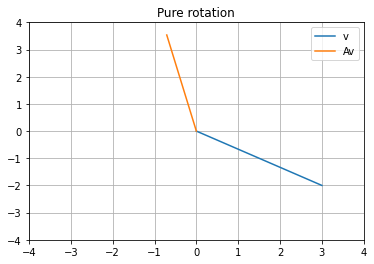

In [18]:
# pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix: rotate by angle th counterclockwise
th = 3*np.pi/4
A = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()

## Example 2 (circle to ellipse) 
(1) Generate $XY$ coordinates for a circle
(2) Plot the circle
(3) Create $2 \times 2$ matrix
(4) Multiply matrix by coordinates
(5) Plot new coordinates
etc. : Try with various matrices. Try with a singular matrix



(2, 100)


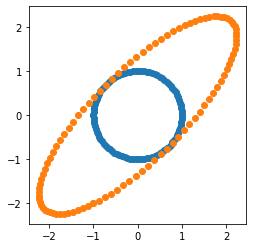

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math
# generate XY coordinates for a circle
x=np.linspace(-np.pi,np.pi,100)
xy=np.vstack((np.cos(x),np.sin(x)))
print(np.shape(xy))
# plot the circle
plt.plot(xy[0,:],xy[1,:],'o')
# create a 2x2 matrix
T=np.array([[1,2],[2,1]])
# multiply matrix by coords
newxy=T@xy
# plot the new coords
plt.plot(newxy[0,:],newxy[1,:],'o')
plt.axis('square')
plt.show()

## Example 3 (composing linear transformations)

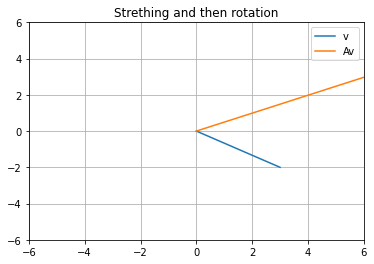

In [19]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix

# scale by a factor of 3
A1 = np.array([ [3,0], [0,3] ])
# rotate counterclockwise by angle alpha

alpha = np.pi/3
A2 = np.array([ [math.cos(alpha),-math.sin(alpha)], [math.sin(alpha),math.cos(alpha)] ])

# output vector is (A2A1)v (convert v to column)
u = A2@A1@np.matrix.transpose(v)

# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,u[0]],[0,u[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Strething and then rotation')
plt.show()

## Example 4 (prototype and image)

[[1 2 3 1]
 [1 3 1 1]]


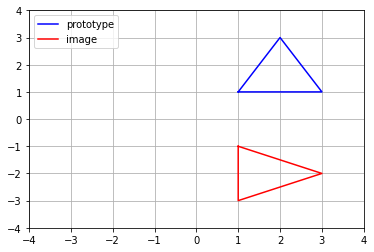

In [26]:
# make a prototype

coordinates = np.array([ [1, 1],[2,3],[3,1],[1,1] ])
coords = coordinates.transpose()
print(coords)
x = coords[0,:]
y = coords[1,:]

# plot the prototype
plt.plot(x,y,'b',label='prototype')

# create a matrix
A = np.array([[0,1],[-1,0]])
newcoords = A@coords
newx = newcoords[0,:]
newy = newcoords[1,:]
plt.plot(newx,newy,'r', label='image')
plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.show()

## Example 5 (prototype and image: Homogeneous coordinatess)

[[1. 2. 3. 1.]
 [1. 3. 1. 1.]
 [1. 1. 1. 1.]]


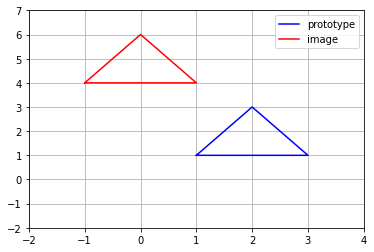

In [36]:
# make a prototype

coordinates = np.array([ [1, 1],[2,3],[3,1],[1,1] ])
coords = coordinates.transpose()

# form a matrix of coordinates with rows x,y,1
x = coords[0,:]
y = coords[1,:]
Ones = np.ones((1,4))
coords = np.vstack((x,y,Ones))
print(coords)

# plot the prototype
plt.plot(x,y,'b',label='prototype')
# define the matrix
A = np.array([[1,0,-2],[0,1,3],[0,0,1]])

newcoords=A@coords
newx = newcoords[0,:]
newy = newcoords[1,:]
# plot the prototype
plt.plot(newx,newy,'r',label='image')

plt.grid()
plt.axis((-2, 4, -2, 7))
plt.legend()
plt.show()

## Example 6
### Perform a composition of three different transformations in the following order: 
(1) Scale by a factor of3;
(2) Rotate counter-clockwise by $\pi/6$;
(3) Translate to the right by 5 units and down by 2 units.

[[1. 2. 3. 1.]
 [1. 3. 1. 1.]
 [1. 1. 1. 1.]]


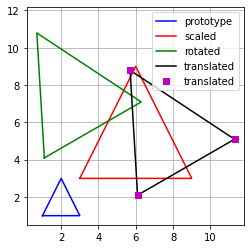

In [49]:
coordinates = np.array([ [1, 1],[2,3],[3,1],[1,1] ])
coords = coordinates.transpose()

# form a matrix of coordinates with rows x,y,1
x = coords[0,:]
y = coords[1,:]
Ones = np.ones((1,4))
coords = np.vstack((x,y,Ones))
print(coords)

# plot the prototype
plt.plot(x,y,'b',label='prototype')

# define the matrix S for scaling
S = np.array([[3,0,0],[0,3,0],[0,0,1]])

coords1=S@coords
x1 = coords1[0,:]
y1 = coords1[1,:]
# plot the prototype
plt.plot(x1,y1,'r',label='scaled')


# define the matrix for rotation
th = np.pi/6
R = np.array([ [math.cos(th),-math.sin(th),0], [math.sin(th),math.cos(th),0],[0,0,1] ])
coords2=R@coords1
x2 = coords2[0,:]
y2 = coords2[1,:]
# plot the prototype
plt.plot(x2,y2,'g',label='rotated')


# define the matrix for translation
B = np.array([[1,0,5],[0, 1, -2], [0,0,1]])
coords3=B@coords2
x3 = coords3[0,:]
y3 = coords3[1,:]
# plot the prototype
plt.plot(x3,y3,'k',label='translated')

# One more way to do (1), (2), and (3) all together
coords4=B@R@S@coords
x4 = coords4[0,:]
y4 = coords4[1,:]
plt.plot(x4,y4,'ms',label='translated')

plt.grid()
plt.axis('square')
plt.legend()
plt.show()

## Example 7: 
### One more example of translation

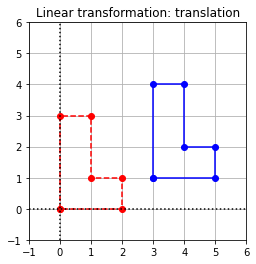

In [50]:
# Linear Transformation: Translation
# matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
# make a prototype
coords = np.array([[0,0],[0,3],[1,3],[1,1],[2,1],[2,0],[0,0]])
coords = coords.transpose()

x = coords[0,:]
y = coords[1,:]

# Form a matrix of coordinates with rows x, y, 1
Ones = np.ones((1,7))
coords = np.vstack((x,y,Ones))

# Define the matrix for the transfomation L
A = np.array([[1,0,3],[0,1,1],[0,0,1]])

## Compute translation by matrix multiplication
coords1 = A@coords

## Slice off the first and second rows.  These are the coords of the translated points
x_new = coords1[0,:]
y_new = coords1[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_new,y_new,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_new,y_new,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Linear transformation: translation");


## Example 8: 
Construct a $(3 \times 3)$ matrix that rotates points $-30^{o}$ about the point (-2,6) using homogeneous coordinates. 
 
Hint: Rotation of a figure about a point $p=(x,y)$ in $\mathbb{R}^2$ is accomplished by first translating by $-p$, rotating about the originm and then translating back by $p$. 



matrix of transformation:
[[ 0.8660254   0.5        -3.26794919]
 [-0.5         0.8660254  -0.19615242]
 [ 0.          0.          1.        ]]


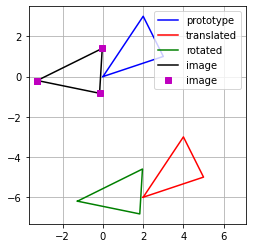

In [65]:
coordinates = np.array([ [0, 0],[2,3],[3,1],[0,0] ])
coords = coordinates.transpose()

# form a matrix of coordinates with rows x,y,1
x = coords[0,:]
y = coords[1,:]
Ones = np.ones((1,4))
coords = np.vstack((x,y,Ones))


# plot the prototype
plt.plot(x,y,'b',label='prototype')

# Translate by -p
T1 = np.array([[1,0,2],[0,1,-6],[0,0,1]])

coords1=T1@coords
x1 = coords1[0,:]
y1 = coords1[1,:]
# plot the prototype
plt.plot(x1,y1,'r',label='translated')


# Rotate
th = -np.pi/6
R = np.array([ [math.cos(th),-math.sin(th),0], [math.sin(th),math.cos(th),0],[0,0,1] ])
coords2=R@coords1
x2 = coords2[0,:]
y2 = coords2[1,:]
# plot the prototype
plt.plot(x2,y2,'g',label='rotated')

# Translate back by p
T2 = np.array([[1,0,-2],[0, 1, 6], [0,0,1]])
coords3=T2@coords2
x3 = coords3[0,:]
y3 = coords3[1,:]
# plot the prototype
plt.plot(x3,y3,'k',label='image')

# One more way to do (1), (2), and (3) all together
coords4=T2@R@T1@coords
x4 = coords4[0,:]
y4 = coords4[1,:]
plt.plot(x4,y4,'ms',label='image')
print('matrix of transformation:'), print(T2@R@T1)

plt.grid()
plt.axis('square')
plt.legend()
plt.show()

## Example 9: 
Give the $(4 \times 4)$ matrix that rotates vector $\vec{v}=\begin{bmatrix}2\\3\\4\end{bmatrix}$ in $\mathbb{R}^3$ about the $z$-axis through an angle of $180 ^{o}$, and then translates by vector $\vec{u}=\begin{bmatrix}5\\-2\\1\end{bmatrix}$. Plot the prototype and its image.

2 3 4
3.0000000000000004 -5.0 5.0


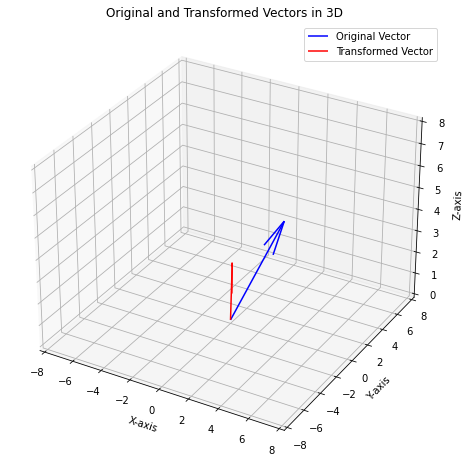

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the rotation angle (in radians)
theta = np.radians(180)

# Rotation matrix about the z-axis (in homogeneous coordinates)
Rz = np.array([
   [np.cos(theta), np.sin(theta), 0, 0],
   [-np.sin(theta), np.cos(theta), 0, 0],
   [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Translation matrix
T = np.array([
    [1, 0, 0, 5],
    [0, 1, 0, -2],
    [0, 0, 1, 1],
    [0, 0, 0, 1]
])

# Combined transformation matrix
Transformation = T@ Rz # Matrix multiplication

# Choose a 3D vector
v = np.array([2, 3, 4, 1])  # Homogeneous coordinates (x, y, z, 1)

# Apply the transformation
v_transformed = Transformation @ v  # Matrix-vector multiplication

# Extract the original and transformed coordinates
x_orig, y_orig, z_orig = v[0], v[1], v[2]
x_trans, y_trans, z_trans = v_transformed[0], v_transformed[1], v_transformed[2]
print(x_orig, y_orig, z_orig)
print(x_trans, y_trans, z_trans)

# Plot the original and transformed vectors in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original vector
ax.quiver(0, 0, 0, x_orig, y_orig, z_orig, color='blue', label="Original Vector")

# Plot the transformed vector
ax.quiver(0, 0, 0, x_trans, y_trans, z_trans, color='red', label="Transformed Vector")

# Set axes limits
ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])
ax.set_zlim([0, 8])

# Labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Original and Transformed Vectors in 3D")
ax.legend()

# Show plot
# Set the viewing angle (elevation, azimuth)
#ax.view_init(elev=45, azim=45)  # Change these values to adjust the view

plt.show()
